# Unsupervised-to-Supervised-ML

#  1. Implanting K-means clustering algorithm

In [170]:
import numpy as np
import matplotlib.pyplot as plt

In [171]:
np.random.seed(123)

In [172]:
import pandas as pd

In [173]:
df = pd.read_csv('cluster_data1.csv')

In [174]:
df.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [175]:
# Calculate the mean and standard deviation for each column
means = df.mean()
stds = df.std()

# Apply Z-score normalization
df = (df - means) / stds

# Display the normalized data
df.head()


,X1,X2,X3,X4
0,1.034539,-0.124540,0.703536,0.656917
1,0.551486,-0.355171,1.043591,0.787951
2,-0.293857,-0.124540,0.420157,0.394849
3,2.121409,-0.124540,1.610349,1.181053
4,0.189196,0.797981,0.420157,0.525883


## Plotting total of 6 graphs, becuase in the 1st iteration the values of the centroid remains the same so on

In [176]:
def k_means_all_features(X_full, X_plot, k, max_iters=5):
    # Randomly initialize centroids using all features (X1, X2, X3, X4)
    initial_centroids = X_full[np.random.choice(X_full.shape[0], k, replace=False)]
    centroids = initial_centroids

    # Plot the initial centroids before any iteration
    plt.figure(figsize=(8, 6))
    plt.title('Initial Centroids')
    for j in range(k):
        plt.scatter(X_plot[:, 0], X_plot[:, 1], color='gray', label='Data points', alpha=0.6)
        plt.scatter(*initial_centroids[j][:2], color='red', marker='x', s=200, label=f'Initial Centroid {j+1}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

    for i in range(max_iters):
        # Step 1: Assign each point to the nearest centroid using all features
        distances = np.sqrt(((X_full - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Step 2: Compute the new centroids by averaging points in each cluster
        new_centroids = np.array([X_full[labels == j].mean(axis=0) for j in range(k)])

        # Print the centroids for the current iteration
        print(f"\nCentroids at iteration {i+1}:")
        for idx, centroid in enumerate(centroids):
            print(f"Centroid {idx+1}: {centroid}")

        # Plot the current state of clusters using X1 and X2
        plt.figure(figsize=(8, 6))
        for j in range(k):
            cluster = X_plot[labels == j]
            plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {j+1}')
            plt.scatter(*centroids[j][:2], color='red', marker='x', s=200, label=f'Centroid {j+1}')
        plt.title(f'Iteration {i+1}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.show()

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids



This function implements **K-means clustering** using all features (X1, X2, X3, X4).

It randomly initializes centroids, assigns each data point to the nearest centroid, updates centroids by averaging the points in each cluster, and iterates the process.

The algorithm stops when centroids stop changing, indicating convergence, or when the maximum number of iterations is reached.




In [177]:
X_full = df[['X1', 'X2', 'X3', 'X4']].values
X_plot = df[['X1', 'X2']].values

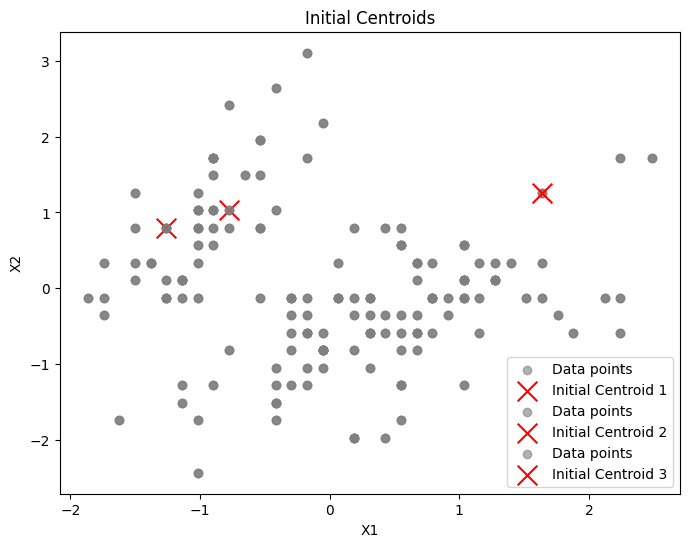


Centroids at iteration 1:
Centroid 1: [-0.77691058  1.02861128 -1.28011819 -1.30859282]
Centroid 2: [-1.25996379  0.79798095 -1.05341485 -1.30859282]
Centroid 3: [1.63835547 1.25924161 1.32697021 1.70518904]


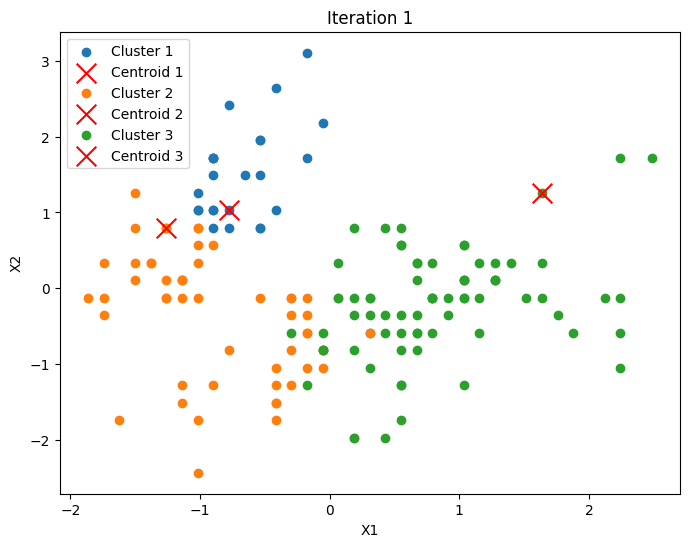


Centroids at iteration 2:
Centroid 1: [-0.63682515  1.42529545 -1.22797642 -1.15135203]
Centroid 2: [-0.83058316 -0.3936091  -0.56642249 -0.60489174]
Centroid 3: [ 0.85594534 -0.20249993  0.86318627  0.86546415]


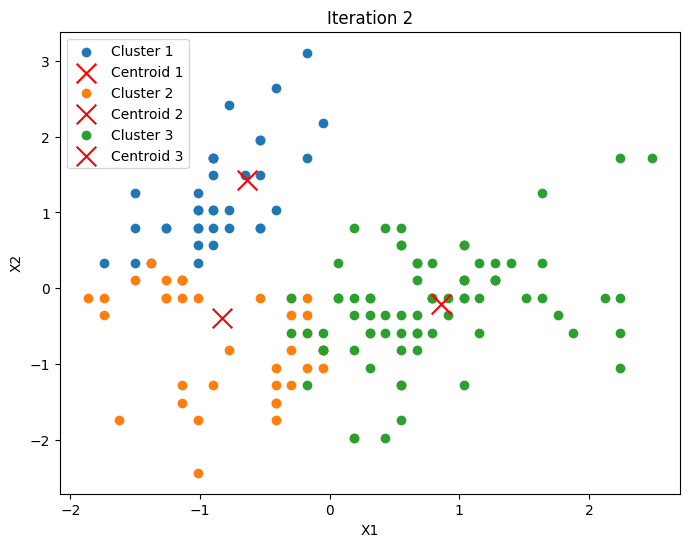


Centroids at iteration 3:
Centroid 1: [-0.87083759  1.22080322 -1.29428714 -1.21759699]
Centroid 2: [-0.78008856 -0.72539309 -0.4329636  -0.49135449]
Centroid 3: [ 0.8025463  -0.21557867  0.82956519  0.82243371]


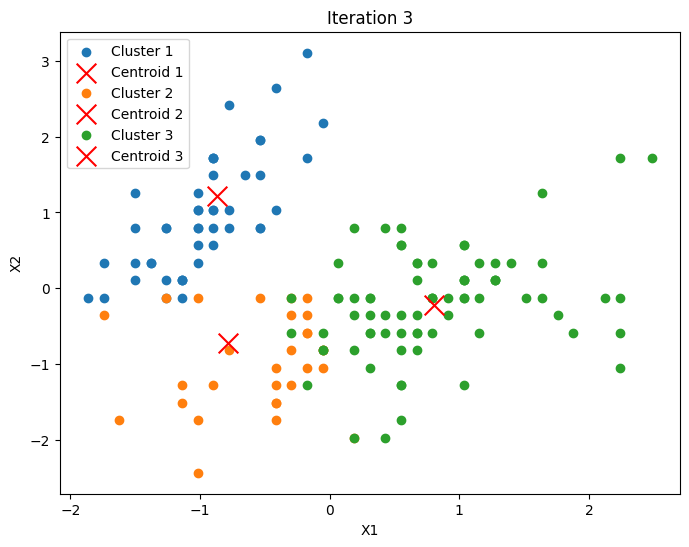


Centroids at iteration 4:
Centroid 1: [-0.97643255  0.96343314 -1.29859944 -1.25162152]
Centroid 2: [-0.56036948 -0.98343955 -0.09969735 -0.16543418]
Centroid 3: [ 0.81555483 -0.21064237  0.83502396  0.83162908]


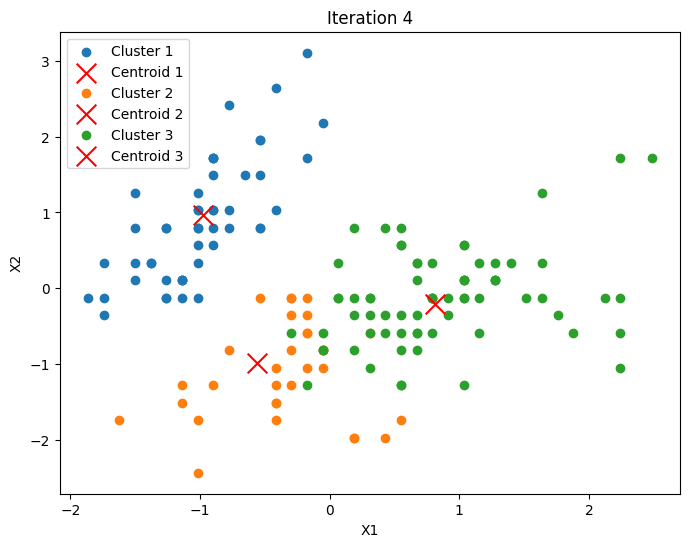


Centroids at iteration 5:
Centroid 1: [-0.99872072  0.89211578 -1.29862458 -1.25243539]
Centroid 2: [-0.35618681 -1.10657921  0.09838437  0.01442783]
Centroid 3: [ 0.85684438 -0.13442454  0.86546698  0.87031531]


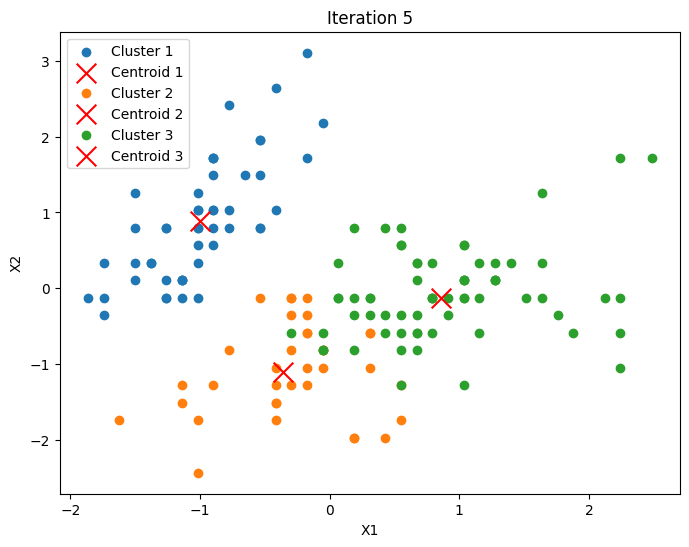

In [178]:
k_means_all_features(X_full, X_plot, 3)


# **Inference from K-Means Clustering**

**Iteration 1:** Centroids are randomly placed, resulting in poorly defined clusters. Points are far from their respective centroids.

**Iteration 2-3:** Centroids move closer to the densest regions. Clusters become more distinct, especially for the orange and green clusters, while the blue cluster still adjusts.

**Iteration 4:** Centroids make minimal adjustments. Clusters are well-formed, and the algorithm converges with clearly separated clusters and stable centroids.

**Final Observations:**

**Convergence**: The K-Means algorithm converges within 5 iterations. After iteration 3, the centroid movements are minimal, indicating that the clusters have been found and stabilized.

**Cluster Separation:** The blue, orange, and green clusters are well separated with clear centroids, showing that K-Means has successfully grouped similar data points together.

**Centroid Movement:** The centroids move significantly in the early iterations but make smaller adjustments as the algorithm converges toward the optimal cluster positions.

# 2. Implanting K-means++ clustering algorithm

## K-Means++ Working:

**Step 1:** Select the first centroid randomly
From the given dataset, one point is selected at random as the first centroid.

**Step 2:** Select subsequent centroids based on distance
For each data point, compute the distance from the nearest selected centroid. The probability of selecting a point as the next centroid is proportional to the square of this distance. This ensures centroids are spread out.

**Step 3:** Repeat until k centroids are chosen
Continue selecting centroids by maximizing the distance from existing ones to ensure better cluster initialization.

**Step 4:** Proceed with the standard K-Means algorithm
After initialization, K-Means iterates by assigning points to the nearest centroid and updating centroids based on the mean of the assigned points until convergence.

K-Means++ improves cluster initialization, leading to faster and more accurate convergence.

In [141]:

X_full = df[['X1', 'X2', 'X3', 'X4']].values


In [142]:
np.random.seed(123)

In [143]:
# K-means++ parameters
K = 3  # Number of clusters
max_iters = 4# K-means++ parameters


In [144]:
# Function to calculate the Euclidean distance between two points
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

## Step1: Selecting the first centroid randomly


First Centroid Coordinates: [-0.29385737 -1.27769204  0.08010185 -0.12928687]



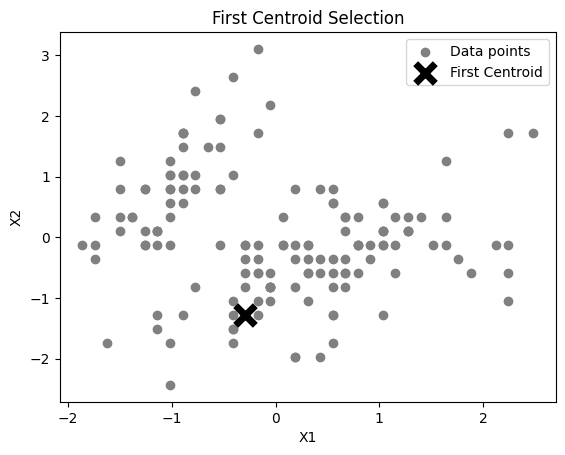

In [145]:
# Step 1: Randomly select the first centroid
first_centroid = X_full[np.random.randint(X_full.shape[0])]
centroids = [first_centroid]

# Print the first centroid coordinates
print(f"\nFirst Centroid Coordinates: {first_centroid}\n")

# Plot the first centroid
plt.scatter(X_full[:, 0], X_full[:, 1], color='gray', label='Data points')
plt.scatter(first_centroid[0], first_centroid[1], color='k', marker='x', s=200, linewidths=5, label='First Centroid')
plt.title('First Centroid Selection')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

## Step 2: Selecting the 2nd centroid such that has the longest distance from the previous centroid

In [146]:
# Step 2: Calculate the distance of all points from the first centroid
distances = np.array([euclidean_distance(x, centroids[0]) for x in X_full])
second_centroid_index = np.argmax(distances)
second_centroid = X_full[second_centroid_index]
centroids.append(second_centroid)


# Print the coordinates of both centroids
print(f"First Centroid Coordinates: {centroids[0]}")
print(f"Second Centroid Coordinates: {second_centroid}")



First Centroid Coordinates: [-0.29385737 -1.27769204  0.08010185 -0.12928687]
Second Centroid Coordinates: [-0.17309407  3.10428427 -1.28011819 -1.04652483]


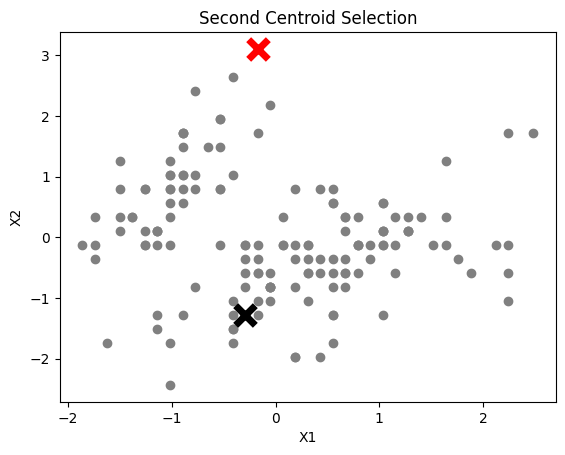

In [147]:
# Plot the second centroid selection
plt.scatter(X_full[:, 0], X_full[:, 1], color='gray', label='Data points')
plt.scatter(centroids[0][0], centroids[0][1], color='k', marker='x', s=200, linewidths=5, label='First Centroid')
plt.scatter(second_centroid[0], second_centroid[1], color='r', marker='x', s=200, linewidths=5, label='Second Centroid')
plt.title('Second Centroid Selection')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


## Step 3: Select the Third Centroid has the longest distance from the previous centroid

In [148]:
# Step 3: Calculate the distance of all points from the nearest centroid (first or second)
distances = np.array([min([euclidean_distance(x, c) for c in centroids]) for x in X_full])
third_centroid_index = np.argmax(distances)
third_centroid = X_full[third_centroid_index]
centroids.append(third_centroid)

# Print the coordinates of all three centroids
print(f"First Centroid Coordinates: {centroids[0]}")
print(f"Second Centroid Coordinates: {second_centroid}")
print(f"Third Centroid Coordinates: {third_centroid}\n")

First Centroid Coordinates: [-0.29385737 -1.27769204  0.08010185 -0.12928687]
Second Centroid Coordinates: [-0.17309407  3.10428427 -1.28011819 -1.04652483]
Third Centroid Coordinates: [2.48369858 1.72050228 1.49699771 1.05001907]



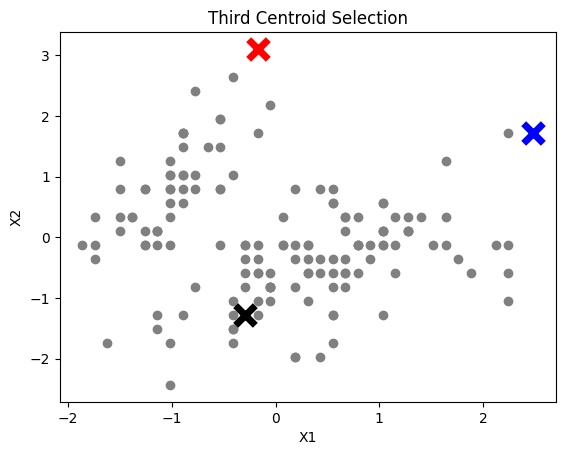

In [149]:
# Plot the third centroid selection
plt.scatter(X_full[:, 0], X_full[:, 1], color='gray', label='Data points')
plt.scatter(centroids[0][0], centroids[0][1], color='k', marker='x', s=200, linewidths=5, label='First Centroid')
plt.scatter(centroids[1][0], centroids[1][1], color='r', marker='x', s=200, linewidths=5, label='Second Centroid')
plt.scatter(third_centroid[0], third_centroid[1], color='b', marker='x', s=200, linewidths=5, label='Third Centroid')
plt.title('Third Centroid Selection')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [150]:
# Print the initial centroids
print("Initial Centroid Coordinates:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i + 1}: {centroid}")



Initial Centroid Coordinates:
Centroid 1: [-0.29385737 -1.27769204  0.08010185 -0.12928687]
Centroid 2: [-0.17309407  3.10428427 -1.28011819 -1.04652483]
Centroid 3: [2.48369858 1.72050228 1.49699771 1.05001907]


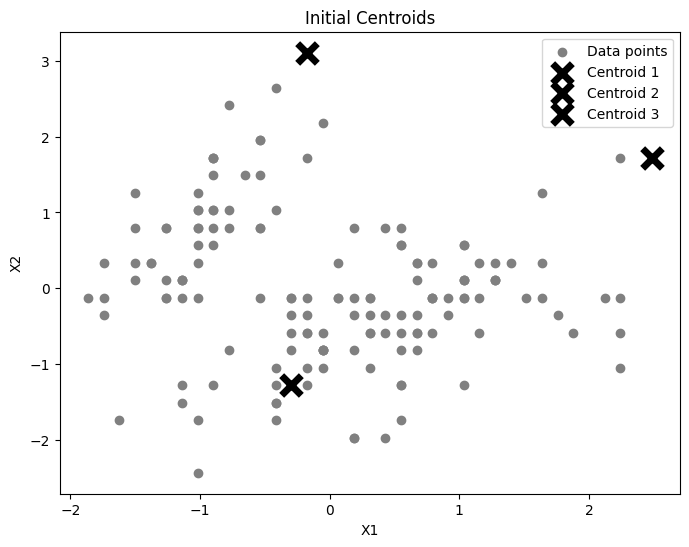


Iteration 1 centroid updates:
Centroid 1 updated to: [-0.13413816 -0.52876343  0.0959467   0.06092376]
Centroid 2 updated to: [-0.80028412  1.35595756 -1.28560294 -1.21560095]
Centroid 3 updated to: [1.4339868  0.2746275  1.1896403  1.23145076]


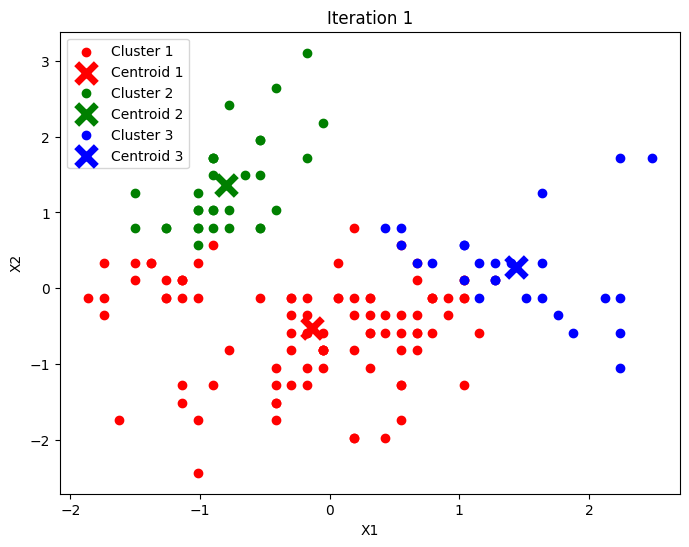


Iteration 2 centroid updates:
Centroid 1 updated to: [-0.01610177 -0.79336834  0.33325391  0.27910241]
Centroid 2 updated to: [-0.99872072  0.89211578 -1.29862458 -1.25243539]
Centroid 3 updated to: [1.21715663 0.09483969 1.0643261  1.08837048]


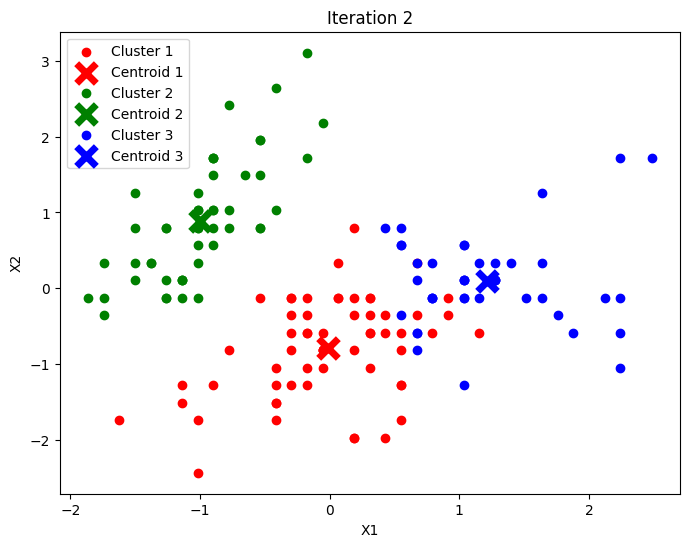


Iteration 3 centroid updates:
Centroid 1 updated to: [-0.0286094  -0.84114177  0.36550516  0.31061296]
Centroid 2 updated to: [-1.01119138  0.83949441 -1.30052149 -1.25093786]
Centroid 3 updated to: [1.18549308 0.11657315 1.01267694 1.02619471]


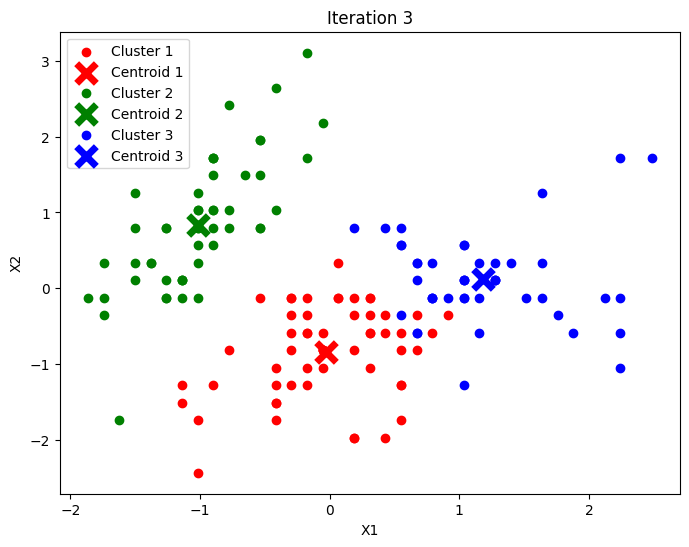


Iteration 4 centroid updates:
Centroid 1 updated to: [-0.0303738  -0.86255744  0.36142008  0.30193409]
Centroid 2 updated to: [-1.01119138  0.83949441 -1.30052149 -1.25093786]
Centroid 3 updated to: [1.16066951 0.12146531 1.00328822 1.02090041]


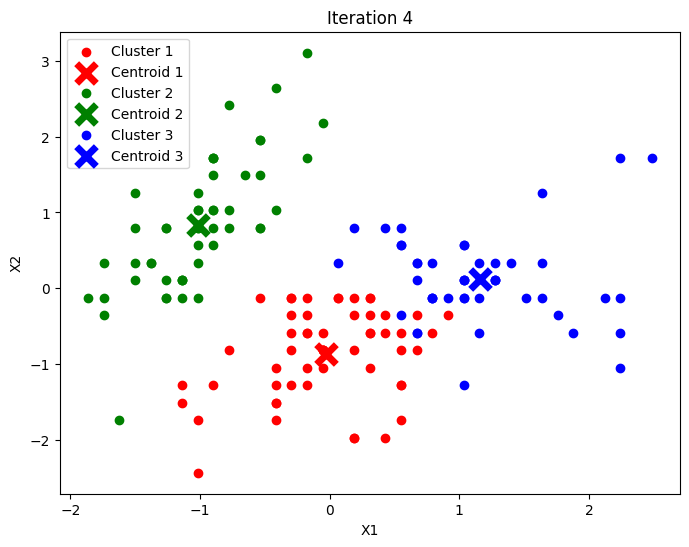

In [151]:
# Plot the initial centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_full[:, 0], X_full[:, 1], color='gray', label='Data points')
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], color='k', marker='x', s=200, linewidths=5, label=f'Centroid {i+1}')
plt.title('Initial Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# K-means algorithm
for it in range(max_iters):
    # Step 1: Assign each data point to the closest centroid
    clusters = [[] for _ in range(K)]
    for point in X_full:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)

    # Step 2: Update centroids by calculating the mean of points in each cluster
    print(f"\nIteration {it + 1} centroid updates:")
    for j in range(K):
        if len(clusters[j]) > 0:
            new_centroid = np.mean(clusters[j], axis=0)
            print(f"Centroid {j + 1} updated to: {new_centroid}")
            centroids[j] = new_centroid

    # Plot the current iteration
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for j, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[j], label=f'Cluster {j+1}')
        plt.scatter(centroids[j][0], centroids[j][1], color=colors[j], marker='x', s=200, linewidths=5, label=f'Centroid {j+1}')

    plt.title(f'Iteration {it + 1}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

final_centroids_part2 = centroids


## Now trying for an extra iteration

In [103]:
max_iters = 5

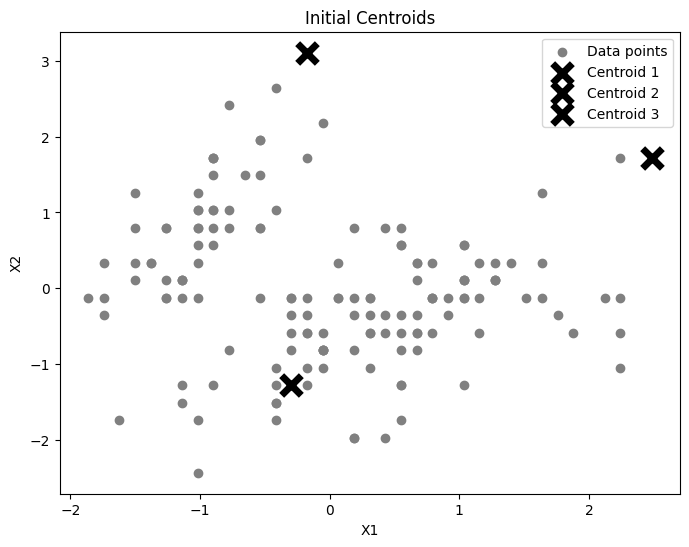


Iteration 1 centroid updates:
Centroid 1 updated to: [-0.13413816 -0.52876343  0.0959467   0.06092376]
Centroid 2 updated to: [-0.80028412  1.35595756 -1.28560294 -1.21560095]
Centroid 3 updated to: [1.4339868  0.2746275  1.1896403  1.23145076]


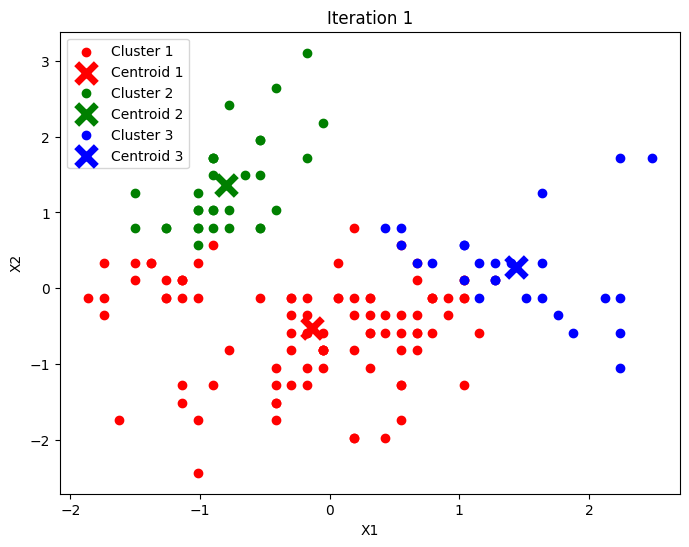


Iteration 2 centroid updates:
Centroid 1 updated to: [-0.01610177 -0.79336834  0.33325391  0.27910241]
Centroid 2 updated to: [-0.99872072  0.89211578 -1.29862458 -1.25243539]
Centroid 3 updated to: [1.21715663 0.09483969 1.0643261  1.08837048]


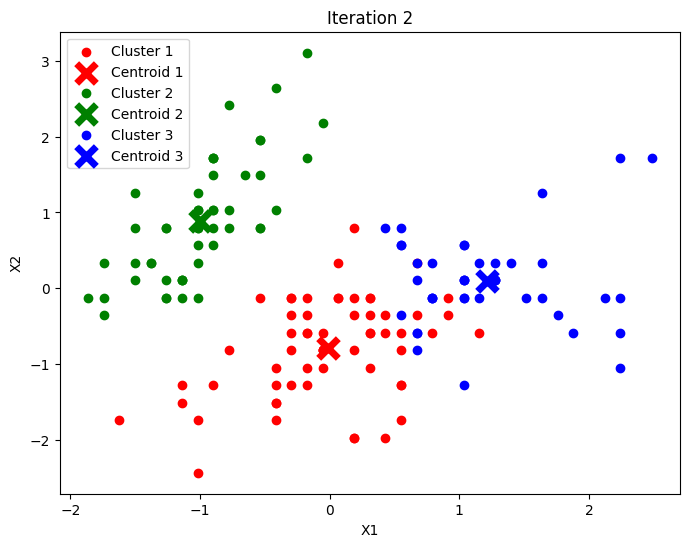


Iteration 3 centroid updates:
Centroid 1 updated to: [-0.0286094  -0.84114177  0.36550516  0.31061296]
Centroid 2 updated to: [-1.01119138  0.83949441 -1.30052149 -1.25093786]
Centroid 3 updated to: [1.18549308 0.11657315 1.01267694 1.02619471]


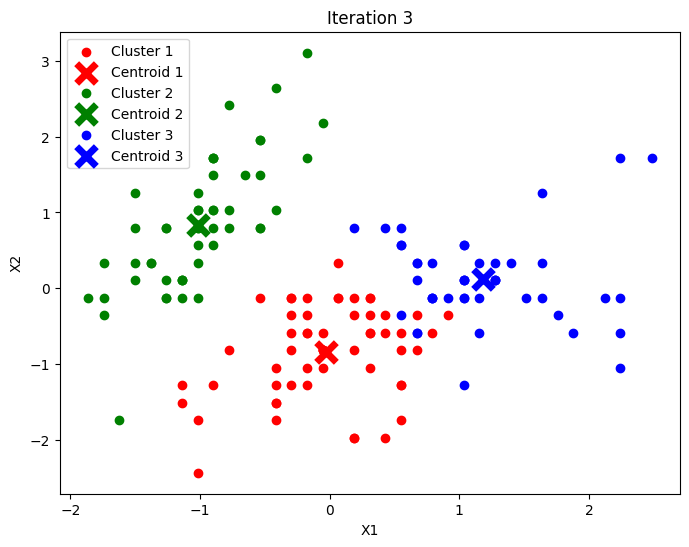


Iteration 4 centroid updates:
Centroid 1 updated to: [-0.0303738  -0.86255744  0.36142008  0.30193409]
Centroid 2 updated to: [-1.01119138  0.83949441 -1.30052149 -1.25093786]
Centroid 3 updated to: [1.16066951 0.12146531 1.00328822 1.02090041]


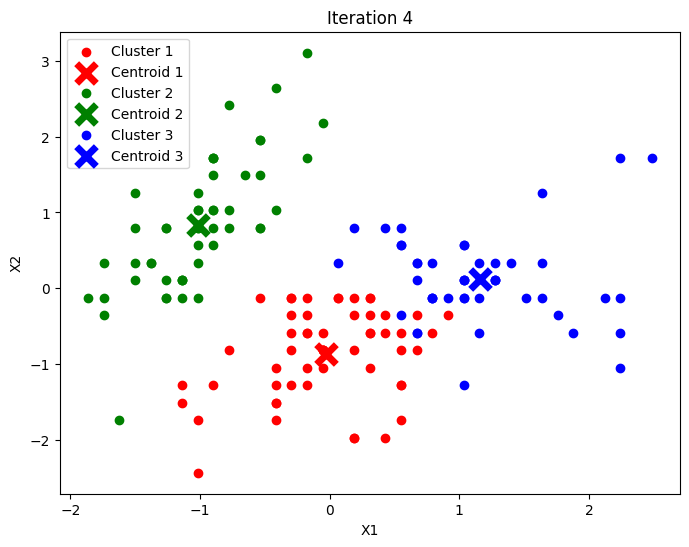


Iteration 5 centroid updates:
Centroid 1 updated to: [-0.03667626 -0.87622442  0.35613415  0.29293377]
Centroid 2 updated to: [-1.01119138  0.83949441 -1.30052149 -1.25093786]
Centroid 3 updated to: [1.14217581 0.11611736 0.99553978 1.01583629]


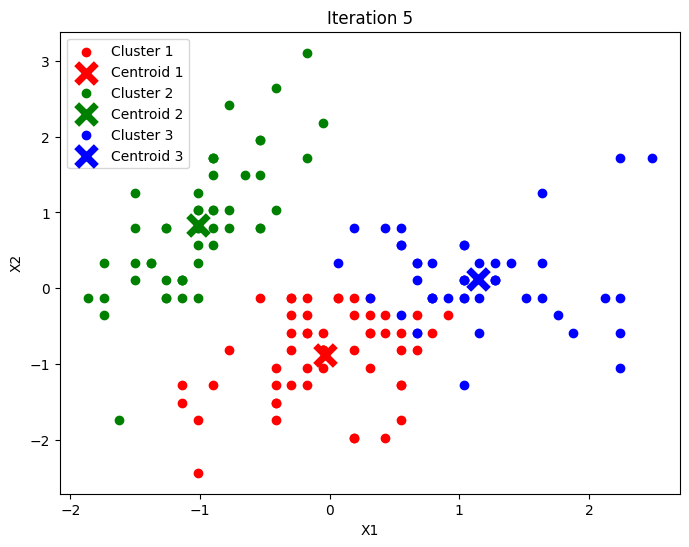

In [104]:
# Plot the initial centroids
plt.figure(figsize=(8, 6))
plt.scatter(X_full[:, 0], X_full[:, 1], color='gray', label='Data points')
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], color='k', marker='x', s=200, linewidths=5, label=f'Centroid {i+1}')
plt.title('Initial Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# K-means algorithm
for it in range(max_iters):
    # Step 1: Assign each data point to the closest centroid
    clusters = [[] for _ in range(K)]
    for point in X_full:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)

    # Step 2: Update centroids by calculating the mean of points in each cluster
    print(f"\nIteration {it + 1} centroid updates:")
    for j in range(K):
        if len(clusters[j]) > 0:
            new_centroid = np.mean(clusters[j], axis=0)
            print(f"Centroid {j + 1} updated to: {new_centroid}")
            centroids[j] = new_centroid

    # Plot the current iteration
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for j, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[j], label=f'Cluster {j+1}')
        plt.scatter(centroids[j][0], centroids[j][1], color=colors[j], marker='x', s=200, linewidths=5, label=f'Centroid {j+1}')

    plt.title(f'Iteration {it + 1}')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

final_centroids_part2 = centroids


## We can see there is no difference in the plots after iteration 4 so we shouldn't proceed furthur


## Inference from K-Means++ Iterations:

**Initial Centroids:** Centroids are well spread using K-Means++, ensuring good initial placement.

**Iteration 1:** Initial clustering shows overlap, especially in the red and blue clusters.

**Iteration 2:** Centroids adjust, leading to more distinct cluster formation, though some overlap remains.

**Iteration 3**: Clusters become more defined with clearer separation.

**Iteration 4:** Centroids stabilize, and clusters are well-formed with minimal overlap.

**Iteration 5:** Final clustering is achieved with clear separation and stable centroids.

K-Means++ ensures better centroid initialization, leading to faster convergence and more accurate clustering as observed in these iterations. By the final iteration, the clusters are clearly defined with minimal overlap.


## Post the implementation of K means ++ creating class labels for each cluster

In [152]:


cluster_assignments = []

for point in X_full:
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    assigned_cluster = np.argmin(distances)  # Assign to the nearest centroid
    cluster_assignments.append(assigned_cluster)

# Display the cluster labels
print("Cluster Assignments for each data point:", cluster_assignments)


Cluster Assignments for each data point: [2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1]


In [153]:
df['Cluster'] = cluster_assignments

In [154]:
df.head()

,X1,X2,X3,X4,Cluster
0,1.034539,-0.124540,0.703536,0.656917,2
1,0.551486,-0.355171,1.043591,0.787951,2
2,-0.293857,-0.124540,0.420157,0.394849,0
3,2.121409,-0.124540,1.610349,1.181053,2
4,0.189196,0.797981,0.420157,0.525883,2


# 3. Implanting KNN classification

## KNN Algorithm Overview

**Euclidean Distance Calculation:** For each test point, the Euclidean distance to all training points is calculated. This helps identify the "closeness" between the points.

**Finding K Nearest Neighbors:** Once distances are computed, the nearest k neighbors (data points) are selected based on the smallest distance values.

**Class Assignment:** The labels of these nearest neighbors are checked, and the majority class (most frequent label) is assigned to the test point.

**Prediction:** The process is repeated for each test point, resulting in class predictions for all new data points based on the k nearest neighbors.

In [155]:
df_2 = pd.read_csv('cluster_data2.csv')

In [156]:
df.head()

,X1,X2,X3,X4,Cluster
0,1.034539,-0.124540,0.703536,0.656917,2
1,0.551486,-0.355171,1.043591,0.787951,2
2,-0.293857,-0.124540,0.420157,0.394849,0
3,2.121409,-0.124540,1.610349,1.181053,2
4,0.189196,0.797981,0.420157,0.525883,2


In [157]:
df_2.head()

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05


## z- score Normalization for 2nd dataset

In [158]:
# Calculate the mean and standard deviation for each column
means = df_2.mean()
stds = df_2.std()

# Apply Z-score normalization
df_2 = (df_2 - means) / stds

# Display the normalized data
df_2.head()

,X1,X2,X3,X4
0,-0.916327,2.019833,-1.320510,-1.245095
1,-1.118883,1.206478,-1.314864,-1.323843
2,0.009646,-1.369149,0.215317,0.093623
3,-0.294189,-1.098030,0.153206,0.041124
4,1.022428,-0.521903,1.005816,1.117348


## Preparing the dataset for training

In [159]:
X_train = df[['X1', 'X2', 'X3', 'X4']]
y_train = df['Cluster']

In [160]:

test_data = df_2[['X1', 'X2', 'X3', 'X4']].values



In [161]:
# Convert DataFrames to NumPy arrays
train_data_array = X_train.values


In [162]:
label_array= y_train.values

In [163]:
# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))


In [164]:
def knn_classification(train_data, train_labels, test_data, k=3):
    predictions = []

    for test_point in test_data:
        # Calculate distances from the test point to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in train_data]

        # Get the indices of the k nearest neighbors
        nearest_indices = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        nearest_labels = [train_labels[idx] for idx in nearest_indices]

        # Determine the majority class
        prediction = max(set(nearest_labels), key=nearest_labels.count)
        predictions.append(prediction)

    return predictions

In [165]:
# Set the number of neighbors (k)
k = 3

# Apply KNN classification on the new data based on the previous clusters
predicted_labels = knn_classification(train_data_array, label_array, test_data, k)

In [166]:
predicted_labels

[1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0]

In [167]:
df_2['predicted_labels'] = predicted_labels

In [168]:
df_2.head(14)

,X1,X2,X3,X4,predicted_labels
0,-0.916327,2.019833,-1.320510,-1.245095,1
1,-1.118883,1.206478,-1.314864,-1.323843,1
2,0.009646,-1.369149,0.215317,0.093623,0
3,-0.294189,-1.098030,0.153206,0.041124,0
4,1.022428,-0.521903,1.005816,1.117348,2
5,-0.019291,-1.030251,0.288721,0.185496,0
6,-1.422718,0.867579,-1.303571,-1.284469,1
7,1.138174,-0.318564,0.983231,0.959852,2
8,-1.205693,1.138698,-1.247107,-1.218846,1
9,0.877745,-0.081336,0.887242,1.274844,2


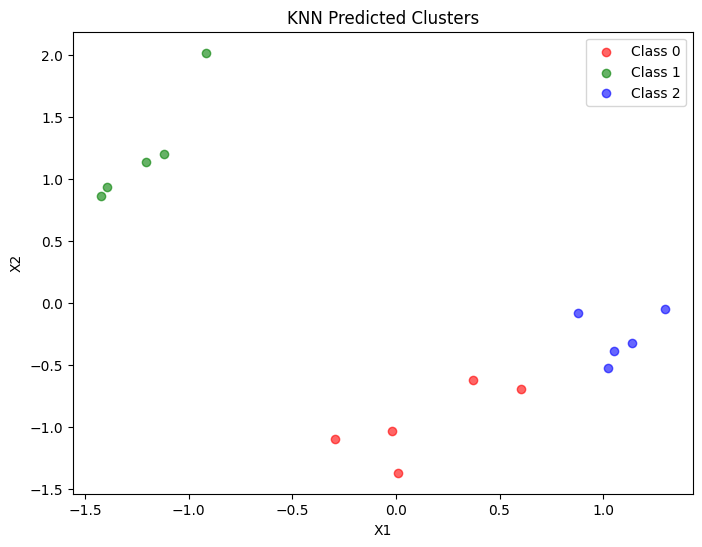

In [169]:
# Plotting the KNN predictions
plt.figure(figsize=(8, 6))

# Using different colors for different predicted labels
colors = ['r', 'g', 'b']  # Example: for three classes 0, 1, 2

for label in np.unique(predicted_labels):
    plt.scatter(test_data[predicted_labels == label, 0],
                test_data[predicted_labels == label, 1],
                label=f'Class {label}',
                color=colors[label],
                alpha=0.6)

plt.title("KNN Predicted Clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

The KNN predicted clusters plot demonstrates the classification of data points into three classes: Class 0, Class 1, and Class 2. Each class is represented with a different color (red for Class 0, green for Class 1, and blue for Class 2). The KNN algorithm effectively groups similar data points based on their proximity in feature space.

* The points clustered around the middle-left are mostly classified as Class 1.
* Points near the center-bottom region are classified as Class 0.
* Points toward the right of the graph are classified as Class 2.

The clear separation between the classes suggests that the algorithm has performed well in distinguishing different clusters in the dataset based on the KNN classification criteria.